<a href="https://colab.research.google.com/github/Nikhil199727/Netflix-Data-Analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import pandas as pd
import numpy as np# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_netflix = pd.read_csv('Netflix Userbase.csv')

In [ ]:
df_netflix.head( )

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df_netflix.isna().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


In [ ]:
df_netflix.duplicated().sum()

0

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
# Count the number of users in each country
country_counts = df_netflix['Country'].value_counts()

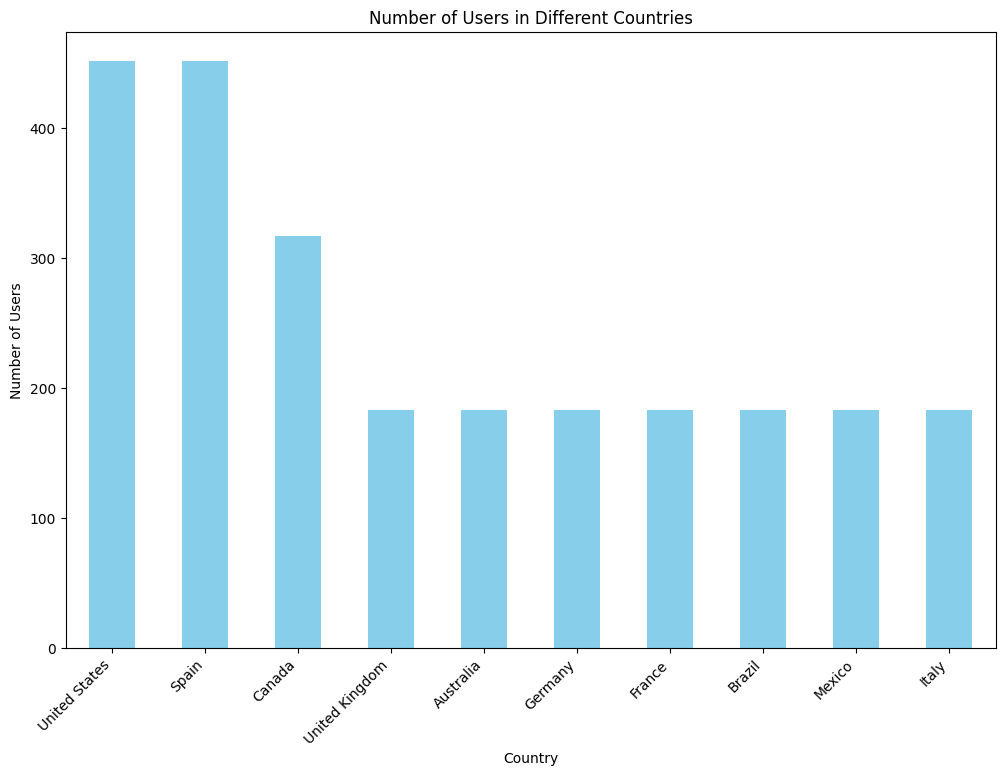

In [ ]:
# Plot the data
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users in Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.show()

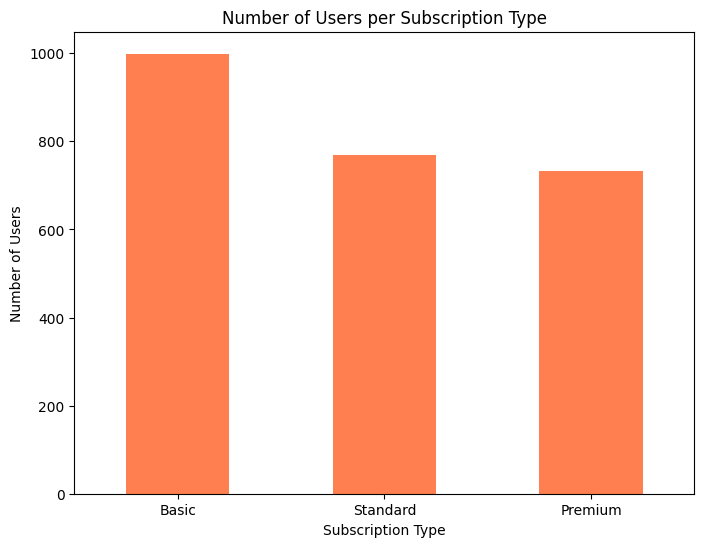

In [ ]:
# Count the number of users per subscription type
subscription_counts = df_netflix['Subscription Type'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color='coral')
plt.title('Number of Users per Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

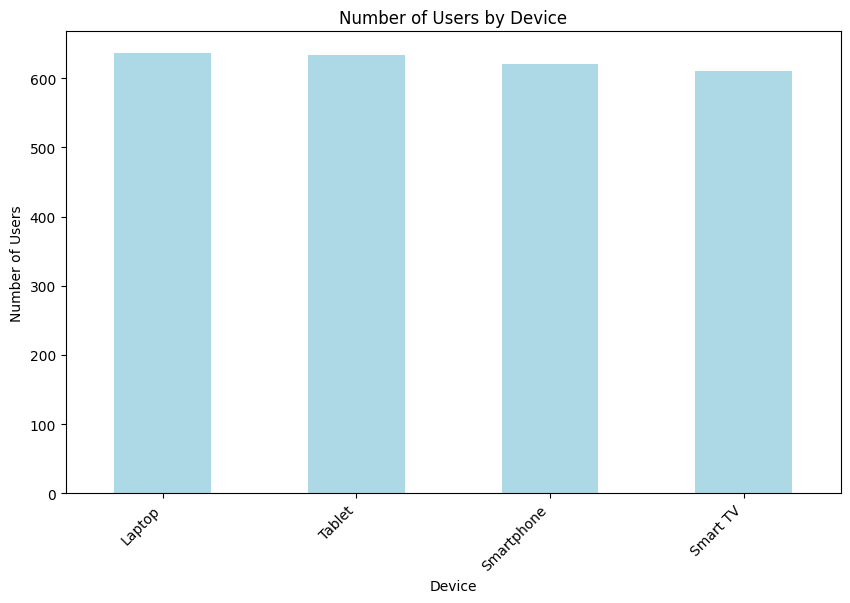

In [ ]:
# Count the number of users per device
device_counts = df_netflix['Device'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Users by Device')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.show()

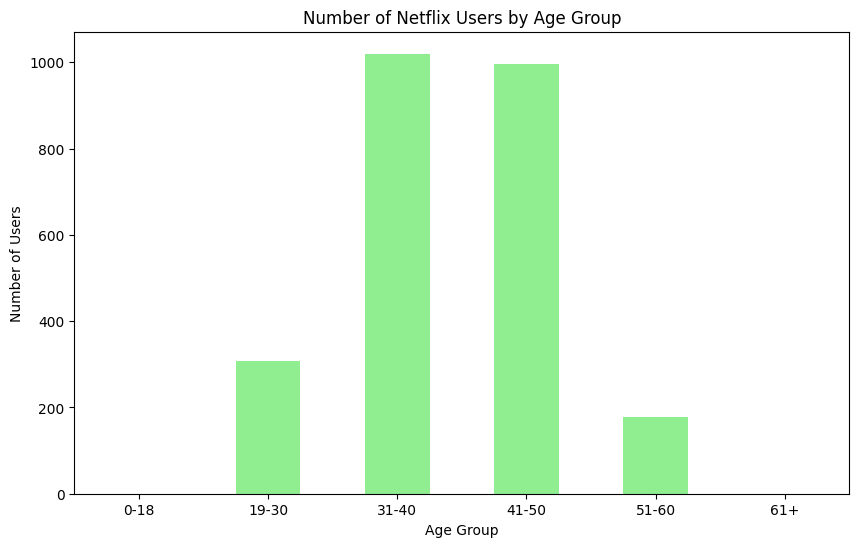

In [ ]:
# Define age bins and labels for age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column 'Age Group' based on the bins
df_netflix['Age Group'] = pd.cut(df_netflix['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of users in each age group
age_group_counts = df_netflix['Age Group'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Netflix Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

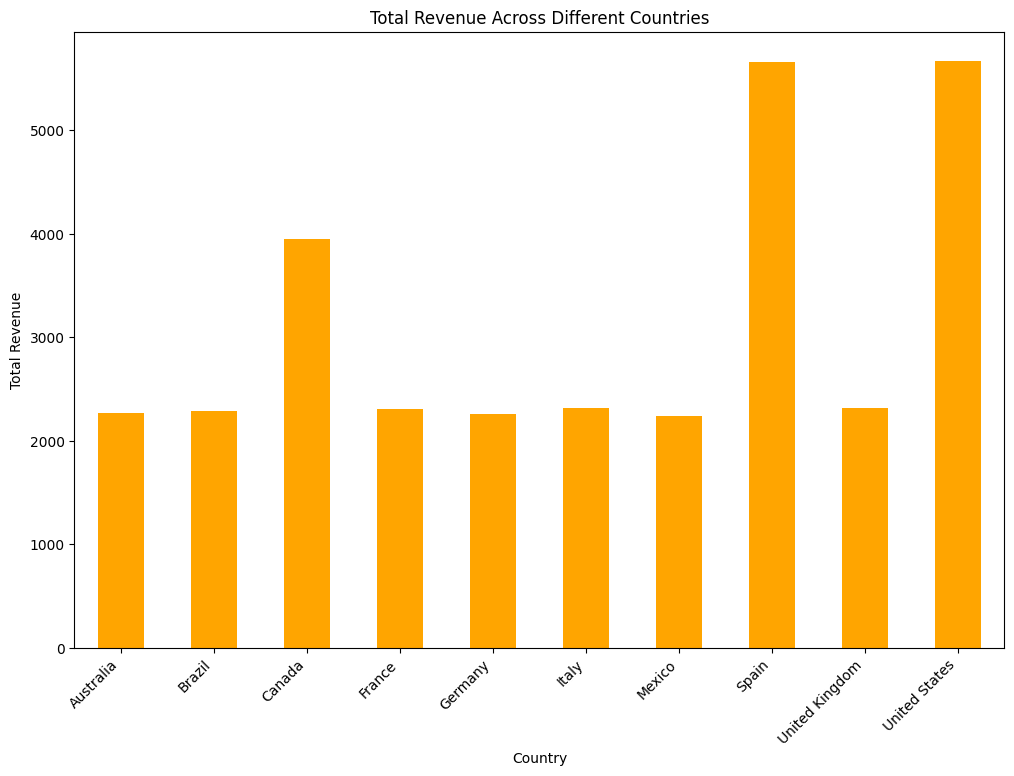

In [ ]:
# Calculate the total revenue per country
revenue_per_country = df_netflix.groupby('Country')['Monthly Revenue'].sum()

# Plot the data
plt.figure(figsize=(12, 8))
revenue_per_country.plot(kind='bar', color='orange')
plt.title('Total Revenue Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

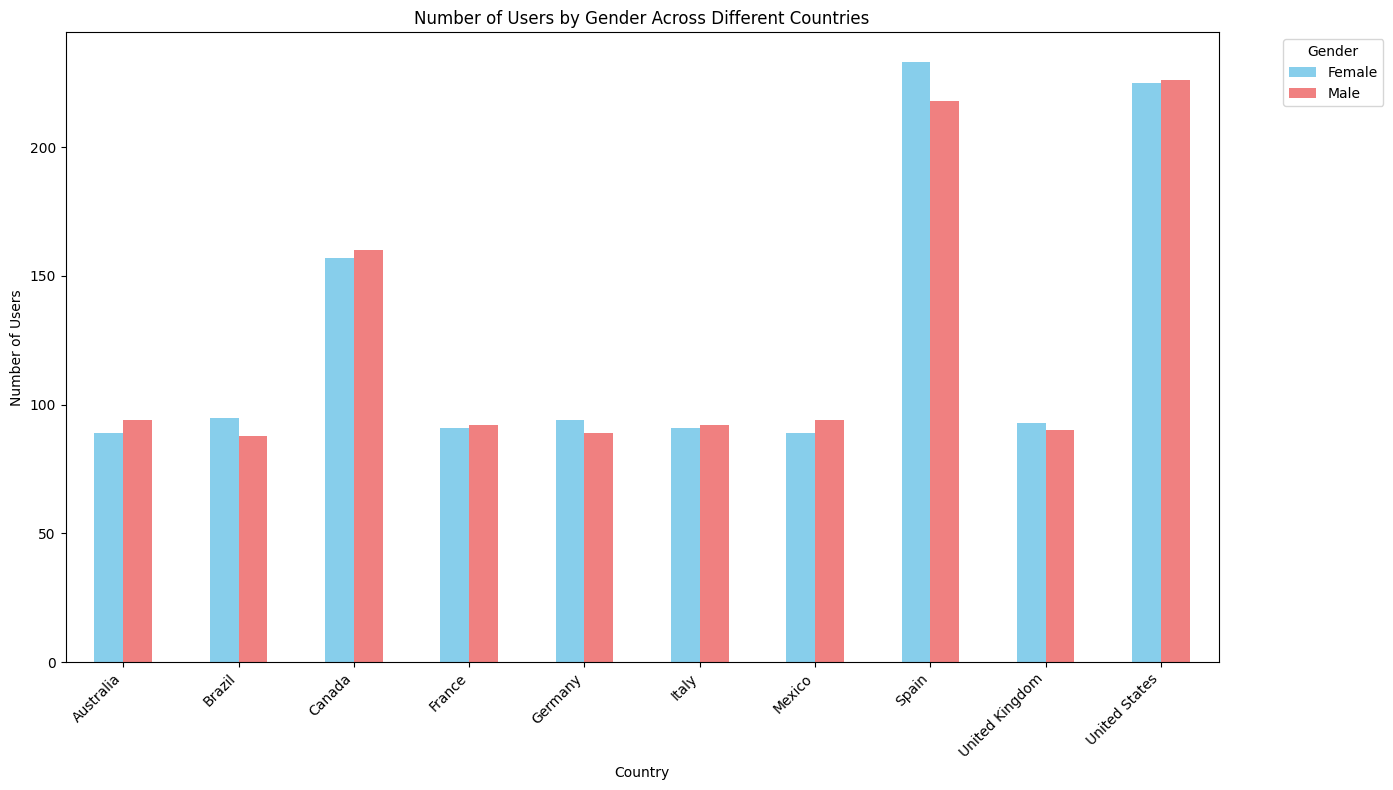

In [ ]:
# Create a pivot table to count the number of users by country and gender
pivot_table = df_netflix.pivot_table(index='Country', columns='Gender', aggfunc='size', fill_value=0)

# Plot the data
pivot_table.plot(kind='bar', figsize=(14, 8), stacked=False, color=['skyblue', 'lightcoral'])

plt.title('Number of Users by Gender Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Count the number of users in each country
country_counts = df_netflix['Country'].value_counts().reset_index()

# Rename the columns for better readability
country_counts.columns = ['Country', 'Number of Users']

# Display the table
print(country_counts)

          Country  Number of Users
0   United States              451
1           Spain              451
2          Canada              317
3  United Kingdom              183
4       Australia              183
5         Germany              183
6          France              183
7          Brazil              183
8          Mexico              183
9           Italy              183


In [ ]:
# Create a pivot table to count the number of users by country, subscription type, and gender
pivot_table = df_netflix.pivot_table(
    index=['Country', 'Subscription Type'],
    columns='Gender',
    aggfunc='size',
    fill_value=0
)

# Reset index to make the table more readable
pivot_table = pivot_table.reset_index()

# Rename columns for better readability
pivot_table.columns.name = None  # Remove the name of the columns index
pivot_table = pivot_table.rename_axis(None, axis=1)  # Remove the name of the index

# Display the table
print(pivot_table)

           Country Subscription Type  Female  Male
0        Australia             Basic      16    15
1        Australia           Premium      45    56
2        Australia          Standard      28    23
3           Brazil             Basic      78    68
4           Brazil           Premium      16    17
5           Brazil          Standard       1     3
6           Canada             Basic      68    77
7           Canada           Premium      40    48
8           Canada          Standard      49    35
9           France             Basic      17    19
10          France           Premium      74    73
11         Germany             Basic      80    69
12         Germany           Premium       1     2
13         Germany          Standard      13    18
14           Italy             Basic      86    90
15           Italy           Premium       3     1
16           Italy          Standard       2     1
17          Mexico             Basic       2     2
18          Mexico          Sta

In [ ]:
# Define age bins and labels for age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column 'Age Group' based on the bins
df_netflix['Age Group'] = pd.cut(df_netflix['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a pivot table to count the number of users by country, age group, and device
pivot_table = df_netflix.pivot_table(
    index=['Country', 'Age Group'],
    columns='Device',
    aggfunc='size',
    fill_value=0
)

# Reset index to make the table more readable
pivot_table = pivot_table.reset_index()

# Rename columns for better readability
pivot_table.columns.name = None  # Remove the name of the columns index
pivot_table = pivot_table.rename_axis(None, axis=1)  # Remove the name of the index

# Display the table
print(pivot_table)

           Country Age Group  Laptop  Smart TV  Smartphone  Tablet
0        Australia      0-18       0         0           0       0
1        Australia     19-30       8         4           8       8
2        Australia     31-40      18        15          20      17
3        Australia     41-50      18        19          20      15
4        Australia     51-60       3         0           7       3
5        Australia       61+       0         0           0       0
6           Brazil      0-18       0         0           0       0
7           Brazil     19-30       8        10           7       6
8           Brazil     31-40      13        14          21      19
9           Brazil     41-50      21        13          25      17
10          Brazil     51-60       2         3           2       2
11          Brazil       61+       0         0           0       0
12          Canada      0-18       0         0           0       0
13          Canada     19-30       7         7           9    